Please check if CUDA in your device is available.

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.8.1+cu102
True


In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
from train import train
from Test import test
%matplotlib inline

To use Visdom, please run the codes below in cmd and visit http://localhost:8097 in your browser.

python -m visdom.server

If you'd like to train for a new one, set **load_path** = None in utils/config.py

In [2]:
train()

Begin training
======user config========
{'SDL_data_dir': 'dataset/SDL',
 'caffe_pretrain': False,
 'data': 'voc',
 'debug_file': '/tmp/debugf',
 'env': 'faster-rcnn',
 'epoch': 1,
 'load_path': 'net/net_pro.pth',
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 600,
 'min_size': 600,
 'num_class': 11,
 'num_workers': 0,
 'plot_every': 10,
 'port': 8097,
 'pretrained_model': 'vgg16',
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'save_path': 'net/net_pro.pth',
 'test_num': 51,
 'test_num_workers': 0,
 'use_adam': False,
 'use_chainer': False,
 'use_drop': False,
 'visualize_score_thresh': 0.7,
 'weight_decay': 0.0005}
==========end============
load data
Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.
model construct completed
0it [00:00, ?it/s]load pretrained model from net/net_pro.pth
51it [00:18,  2.76it/s]
0it [00:00, ?it/s]The 1 -th time in 1
144it [01:02,  2.30it/s]
51it [00:15,  3.23it/s]


You'll need to download pretrained model from somewhere

In [3]:
test()

Begin testing
load data
Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.
model construct completed
0it [00:00, ?it/s]load pretrained model from net/net_pro.pth
51it [00:17,  2.84it/s]
0it [00:00, ?it/s]Average MSE = 420.34027427511387
AC = 0.7540106951871658
51it [00:17,  2.89it/s]{'ap': array([0.56513975, 0.71548999, 0.74936107, 0.86928135, 0.99188312,
       0.531959  , 0.70801332, 0.72555423, 0.77764786, 0.96758773,
       0.98486476]), 'map': 0.7806165609922758}



Floowing is a sample to show a demo of 2 images.

In [5]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


<AxesSubplot:>

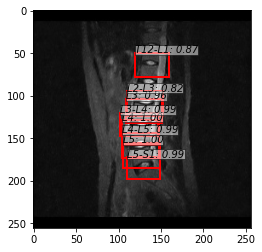

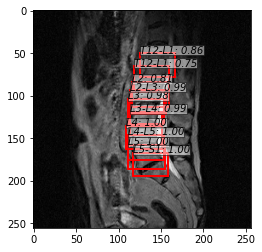

In [3]:
trainer.load(opt.load_path)
imgs = list()
# img = read_image(r'E:\10277\OneDrive\Python\Homework\20210527\Intelligent diagnosis of spine diseases\dataset\SDL\test\data\study0.jpg', color=True)
img = read_image('demo/study0.jpg', color=True)
img = t.from_numpy(img)
imgs.append(img)
# img = read_image(r'E:\10277\OneDrive\Python\Homework\20210527\Intelligent diagnosis of spine diseases\dataset\SDL\test\data\study1.jpg', color=True)
img = read_image('demo/study1.jpg', color=True)
img = t.from_numpy(img)
imgs.append(img)
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(imgs,visualize=True)
# print(_bboxes, _labels, _scores)
vis_bbox(at.tonumpy(imgs[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
vis_bbox(at.tonumpy(imgs[1]),
         at.tonumpy(_bboxes[1]),
         at.tonumpy(_labels[1]).reshape(-1),
         at.tonumpy(_scores[1]).reshape(-1))

In [ ]:
You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer